In [4]:
#три основных подхода к выделению признаков
#анализ главных компонент
#линейный дискриминантный анализ
#ядерный анализ главных компонент

In [5]:
import pandas as pd
df_wine = pd.read_csv('wine_data.csv', header=None)

In [6]:
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [7]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:,:13].values, df_wine.iloc[:,13].values
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=0, test_size=0.3)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
#если составить ковариационную матрицу ij элемент которой будет являться ковариацией между i и j признаком, то 
#собственный вектор такой матрицы будет показывать направление максимальной дисперсии (главную компоненту), а собственное число - величину этой дисперсии

In [9]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
#eig может вернуть комплексные значения, eigh всегда возвращает вещественные


In [10]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([0.36951469, 0.55386396, 0.67201555, 0.74535807, 0.80957914,
       0.86009639, 0.89964293, 0.92608211, 0.9499753 , 0.96627144,
       0.98007165, 0.99179391, 1.        ])

In [11]:
var_exp

[0.3695146859960766,
 0.1843492705988417,
 0.11815159094596982,
 0.07334251763785456,
 0.0642210782173167,
 0.05051724484907649,
 0.03954653891241439,
 0.02643918316922002,
 0.023893192591852897,
 0.016296137737251006,
 0.013800211221948406,
 0.011722262443085956,
 0.008206085679091386]

Text(0.5, 0, 'Индекс главного компонента')

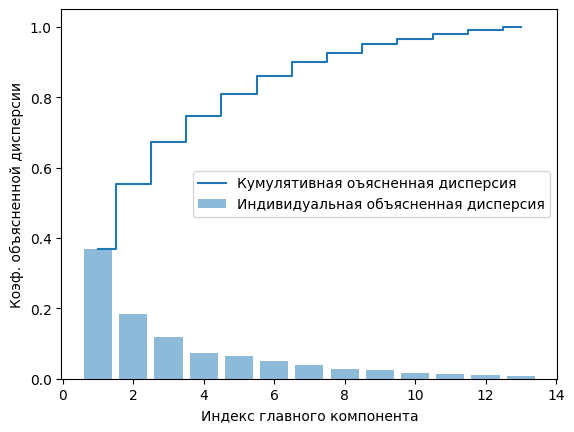

In [12]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha = 0.5, align = 'center',
        label = 'Индивидуальная объясненная дисперсия')
plt.step(range(1, 14), cum_var_exp, where='mid', 
         label = 'Кумулятивная оъясненная дисперсия')
plt.legend(loc = 'best')
plt.ylabel('Коэф. объясненной дисперсии')
plt.xlabel('Индекс главного компонента')

In [13]:
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:,i]) for
               i in range(len(eigen_vals))]

In [14]:
eigen_pairs

[(4.842745315655898,
  array([-0.13724218,  0.24724326, -0.02545159,  0.20694508, -0.15436582,
         -0.39376952, -0.41735106,  0.30572896, -0.30668347,  0.07554066,
         -0.32613263, -0.36861022, -0.29669651])),
 (2.416024587035226,
  array([ 0.50303478,  0.16487119,  0.24456476, -0.11352904,  0.28974518,
          0.05080104, -0.02287338,  0.09048885,  0.00835233,  0.54977581,
         -0.20716433, -0.24902536,  0.38022942])),
 (1.5484582488203522,
  array([-0.13774873,  0.09615039,  0.67777567,  0.62504055,  0.19613548,
          0.14031057,  0.11705386,  0.13121778,  0.0304309 , -0.07992997,
          0.05305915,  0.13239103, -0.07065022])),
 (0.9612043774977359,
  array([-0.0032961 ,  0.56264669, -0.10897711,  0.0338187 , -0.36751107,
          0.24024513,  0.1870533 , -0.02292622,  0.49626233,  0.10648294,
         -0.36905375,  0.14201609, -0.16768217])),
 (0.8416616104578414,
  array([-0.29062523,  0.08953787, -0.16083499,  0.05158734,  0.67648707,
         -0.11851114, 

In [15]:
eigen_pairs.sort(key = lambda k: k[0], reverse = True)

In [16]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))

In [17]:
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [18]:
X_train_pca = X_train_std.dot(w)

Text(0, 0.5, 'PC 2')

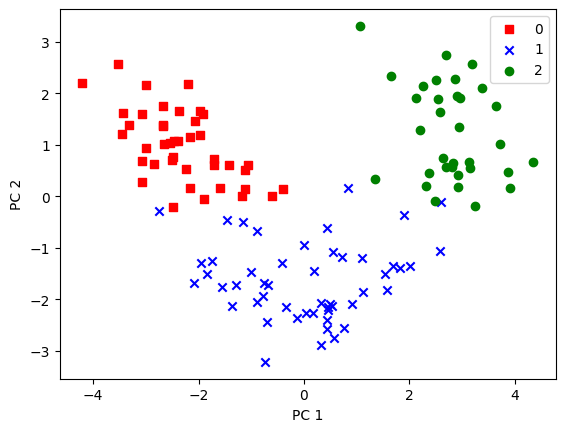

In [19]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label = l, marker = m)
    
plt.legend(loc = 'best')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [31]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, у, classifier, resolution=0.02):
    # на строить генерат ор маркер ов и кар ту цветов
    markers = ( 's', 'х', 'о', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap= ListedColormap(colors[:len(np.unique(y))])
    # вывести поверхность решения
    xl_min, xl_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xxl, xx2 = np.meshgrid(np.arange(xl_min, xl_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xxl.ravel(), xx2.ravel()]).T)
    Z = Z. reshape (xxl. shape)
    plt.contourf(xxl, xx2, Z, alpha=0.4, cmap = cmap)
    plt.xlim(xxl.min(), xxl.max())
    plt. ylim ( xx2.min () , xx2.max () )
    #вывести образцы по классам
    for idx, cl in enumerate (np. unique (у)):
        plt.scatter(x=X[y == cl, 0],
                    у=X[у == cl, 1],
                    alpha=0.6,
                    color=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cl)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 124 but corresponding boolean dimension is 178

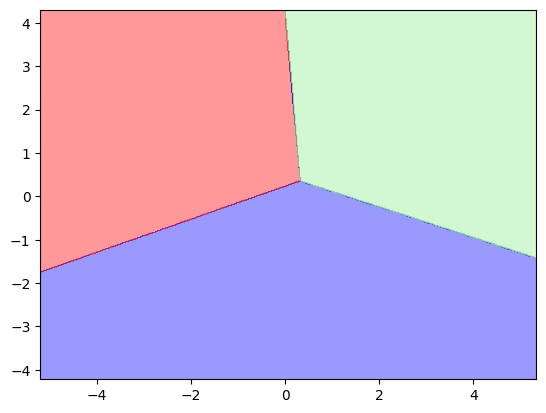

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca  = PCA(n_components=2)
lr = LogisticRegression(multi_class='ovr',
                        random_state=1,
                        solver = 'lbfgs')
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.legend(loc = 'best')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

In [33]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_
#посмотреть значения объясненной дисперсии

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

In [ ]:
#линейный дискриминантный анализ
#суть - найти подпространство признаков которое оптимизирует сепарабельность классов
#с учителем


In [35]:
#вычисление матрицы рассеяния
#каждый вектор средних mi хранит среднее значение признака по образцам класса i
np.set_printoptions(precision=4)
mean_vecs = []
for label in range(0,3):
    mean_vecs.append(np.mean(
        X_train_std[y_train==label], axis=0))
    print(label, mean_vecs[label-1])

0 [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]
1 [ 0.9066 -0.3497  0.3201 -0.7189  0.5056  0.8807  0.9589 -0.5516  0.5416
  0.2338  0.5897  0.6563  1.2075]
2 [-0.8749 -0.2848 -0.3735  0.3157 -0.3848 -0.0433  0.0635 -0.0946  0.0703
 -0.8286  0.3144  0.3608 -0.7253]
